# 집값 예측 경진대회

## 패키지 import 및 데이터 전처리

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('C:/Users/Jaesu/github_desktop/Dacon-Basic/집값-예측/Data/train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1350 non-null   int64 
 1   Overall Qual    1350 non-null   int64 
 2   Gr Liv Area     1350 non-null   int64 
 3   Exter Qual      1350 non-null   object
 4   Garage Cars     1350 non-null   int64 
 5   Garage Area     1350 non-null   int64 
 6   Kitchen Qual    1350 non-null   object
 7   Total Bsmt SF   1350 non-null   int64 
 8   1st Flr SF      1350 non-null   int64 
 9   Bsmt Qual       1350 non-null   object
 10  Full Bath       1350 non-null   int64 
 11  Year Built      1350 non-null   int64 
 12  Year Remod/Add  1350 non-null   int64 
 13  Garage Yr Blt   1350 non-null   int64 
 14  target          1350 non-null   int64 
dtypes: int64(12), object(3)
memory usage: 158.3+ KB


In [4]:
df.isnull().values.any()

False

`-` 행은 1350개, 열은 15개이며 결측치는 없다

|컬럼명 |세부사항 |
|:-:|:-:|
|id | 데이터 고유 id|
|Overall Qual | 전반적 재료와 마감 품질|
|Year Built | 완공 연도|
|Year Remod/Add | 리모델링 연도|
|Exter Qual | 외관 재료 품질|
|Bsmt Qual |지하실 높이|
|Total Bsmt SF| 지하실 면적| 
|1st Flr SF | 1층 면적 |
|Gr Liv Area | 지상층 생활 면적|
|Full Bath | 지상층 화장실 개수| 
|Kitchen Qual | 부엌 품질 |
|Garage Yr Blt | 차고 완공 연도|
|Garage Cars| 차고 자리 개수|
|Garage Area| 차고 면적 |
|target | 집값(달러 단위)|

In [5]:
df.head()

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,1,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,2,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,3,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
3,4,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
4,5,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000


In [6]:
df.describe()

,id,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
count,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,675.500000,6.208889,1513.542222,1.870370,502.014815,1082.644444,1167.474074,1.560741,1972.987407,1985.099259,1978.471852,186406.312593
std,389.855743,1.338015,487.523239,0.652483,191.389956,384.067713,375.061407,0.551646,29.307257,20.153244,25.377278,78435.424758
min,1.000000,2.000000,480.000000,1.000000,100.000000,105.000000,480.000000,0.000000,1880.000000,1950.000000,1900.000000,12789.000000
25%,338.250000,5.000000,1144.000000,1.000000,368.000000,816.000000,886.250000,1.000000,1955.000000,1968.000000,1961.000000,135000.000000
50%,675.500000,6.000000,1445.500000,2.000000,484.000000,1009.000000,1092.500000,2.000000,1976.000000,1993.000000,1978.500000,165375.000000
75%,1012.750000,7.000000,1774.500000,2.000000,588.000000,1309.500000,1396.500000,2.000000,2002.000000,2004.000000,2002.000000,217875.000000
max,1350.000000,10.000000,4476.000000,5.000000,1488.000000,2660.000000,2898.000000,4.000000,2010.000000,2010.000000,2207.000000,745000.000000


`-` OverallQual은 높을수록 좋은건지 낮을수록 좋은건지는 아직 모르겠다

`-` 집값은 수치가 깔금하다(대부분 $0$으로 끝남) 

`-` 양적 변수는 지하실 면적, 1층 면적, 지상층 생활 면적, 차고 면적, 집값이고 그 외는 범주형 변수이다

In [4]:
df.drop('id', axis = 1, inplace = True) ## id는 필요없으니 제거

## 데이터 EDA

### 범주형 변수

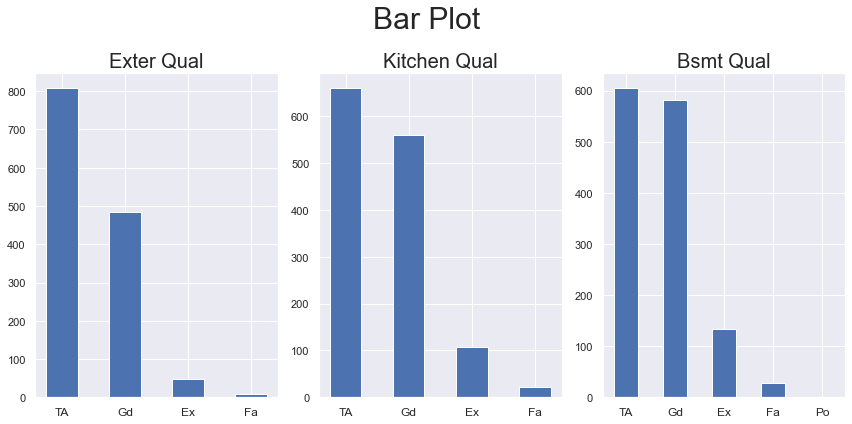

In [100]:
## 히스토그램을 사용

plt.figure(figsize = (12, 6))
plt.suptitle('Bar Plot', fontsize = 30)

for i in range(len(categorical_feature)):
    plt.subplot(1, 3, i+1) ## 범주형 변수는 3개
    plt.title(categorical_feature[i], fontsize = 20)
    temp = df[categorical_feature[i]].value_counts()
    plt.bar(temp.keys(), temp.values, width = 0.5, color = 'b')
    plt.xticks(temp.keys(), fontsize = 12)
    
plt.tight_layout()

`-` 특정값에 몰려있다(TA, Gd)

`-` 퀄리티가 좋은 순서는 Ex(Excellent) >  Gd(Good) > TA(Average/Typical) > Fa(Fair) > Po(Poor) 이다

### 양적 변수

`-` 상관관계를 확인하기에 앞서 범주형 변수를 라벨인코딩을 통해 숫자로 바꿔주자

In [5]:
## 공백과 슬래쉬를 _로 대체 1을 숫자가 아닌 다른 문자로 바꿈 
df.rename(columns = dict(zip(df.columns, [column.replace(' ', '_').replace('/', '_').replace('1', 'Fir') for column in df.columns])), inplace = True) 

In [6]:
def label_encoding(data):
    grade_label = ['Po', 'Fa', 'TA', 'Gd', 'Ex'] ## 0~4점
    
    for grade, label in enumerate(grade_label):
        if data == label:
            return grade

In [7]:
for col in df.columns[df.dtypes == 'object']:
    df[col] = df[col].apply(lambda x: label_encoding(x))

`-` 잘못 입력된 값을 변경

In [8]:
df[df.Garage_Yr_Blt == max(df.Garage_Yr_Blt)]

,Overall_Qual,Gr_Liv_Area,Exter_Qual,Garage_Cars,Garage_Area,Kitchen_Qual,Total_Bsmt_SF,First_Flr_SF,Bsmt_Qual,Full_Bath,Year_Built,Year_Remod_Add,Garage_Yr_Blt,target
254,8,1564,3,2,502,4,1546,1564,3,2,2006,2007,2207,267300


In [9]:
df.loc[254, 'Garage_Yr_Blt'] = 2007

#### 집값

`-` 집값의 분포를 확인하자

In [11]:
sns.set_theme()
sns.set(rc = {'figure.figsize':(10, 6)})

<AxesSubplot:xlabel='target', ylabel='Count'>

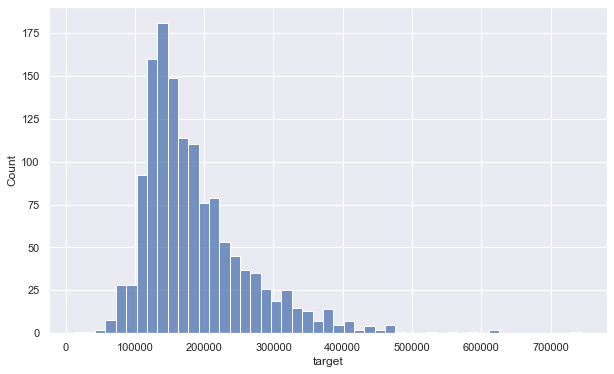

In [12]:
sns.histplot(x = 'target', data = df) 

<AxesSubplot:xlabel='target'>

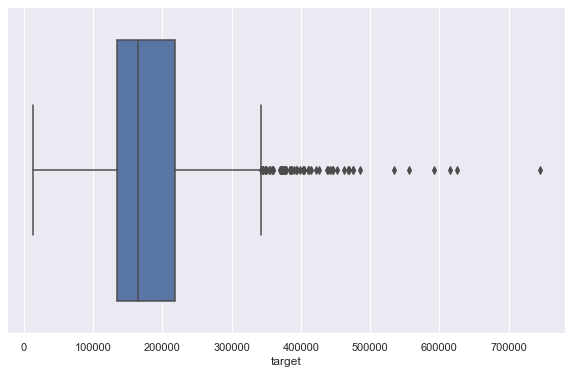

In [19]:
sns.boxplot(x = 'target', data = df) 

`-` 오른쪽으로 꼬리가 긴 분포이며 이상점이 많다

`-` 추후 모델링을 할 땐 로그 변환을 통해 정규화를 시켜줄 필요가 있어보인다

`-` 범주형 변수마다 집값의 박스플랏을 그려보자

<AxesSubplot:xlabel='Garage_Cars', ylabel='target'>

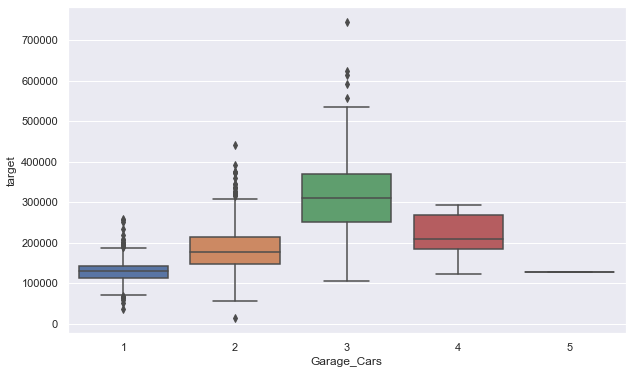

In [22]:
sns.boxplot(y = 'target', x = 'Garage_Cars', data = df)

`-` ??? 차고에 들어가는 차량이 4일 때가 3일 때보다 집값이 싸다

In [24]:
df.groupby('Garage_Cars').size()

Garage_Cars
1    372
2    794
3    172
4     11
5      1
dtype: int64

`-` 차고에 들어가는 차량의 개수가 4와 5인 경우는 표본이 적다

`-` 그런데 차량이 차고에 많이 들어가면 차고의 면적이 넓다는 소리인데

`-` 집값이 더 싼게 신기하다

`-` 이를 시각화하자

<AxesSubplot:xlabel='Garage_Cars', ylabel='Garage_Area'>

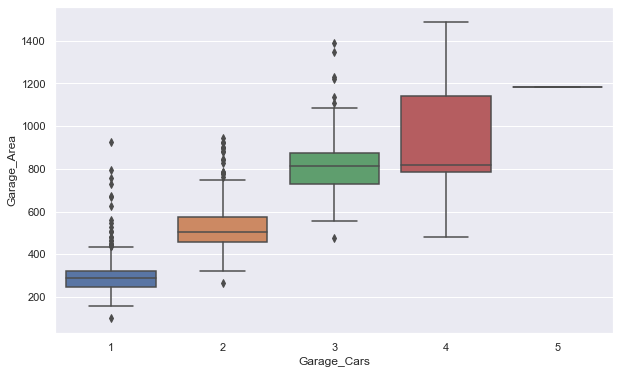

In [25]:
sns.boxplot(data = df, y = 'Garage_Area', x = 'Garage_Cars')

`-` 차량 하나가 차지하는 차고의 면적을 시각화해보자

In [26]:
df['Garage_Area_per_Car'] = df['Garage_Area'] / df['Garage_Cars']

<AxesSubplot:xlabel='Garage_Cars', ylabel='Garage_Area_per_Car'>

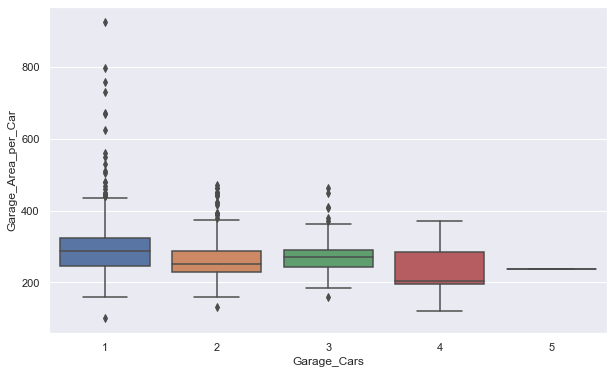

In [27]:
sns.boxplot(data = df, y = 'Garage_Area_per_Car', x = 'Garage_Cars')

`-` 차고에 들어가는 차량이 1대인 경우 이상점이 많은 경우를 제외하면

`-` 차량 1대가 차지하는 차고의 면적의 분포는 비슷하다

<AxesSubplot:xlabel='Full_Bath', ylabel='target'>

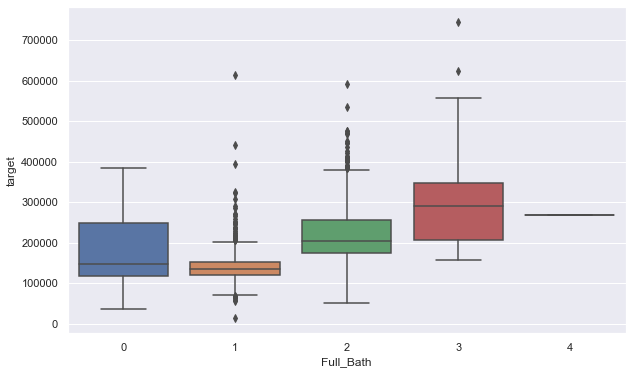

In [34]:
sns.boxplot(y = 'target', x = 'Full_Bath', data = df)

In [36]:
df.groupby('Full_Bath').size()

Full_Bath
0      6
1    612
2    703
3     27
4      2
dtype: int64

`-` 화장실의 개수는 대부분 1,2개이다

<AxesSubplot:xlabel='Exter_Qual', ylabel='target'>

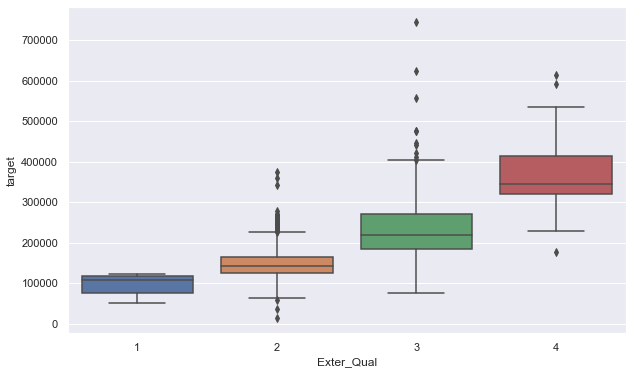

In [14]:
sns.boxplot(y = 'target', x = 'Exter_Qual', data = df)

<AxesSubplot:xlabel='Bsmt_Qual', ylabel='target'>

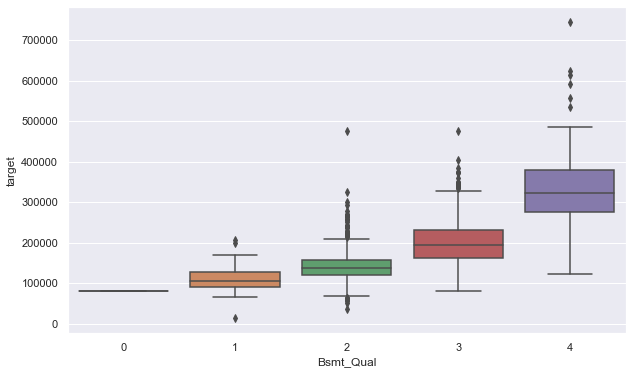

In [16]:
sns.boxplot(y = 'target', x = 'Bsmt_Qual', data = df)

<AxesSubplot:xlabel='Kitchen_Qual', ylabel='target'>

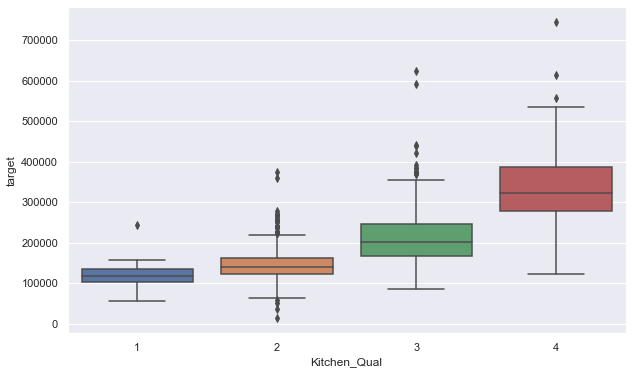

In [21]:
sns.boxplot(y = 'target', x = 'Kitchen_Qual', data = df)

<AxesSubplot:xlabel='Overall Qual', ylabel='target'>

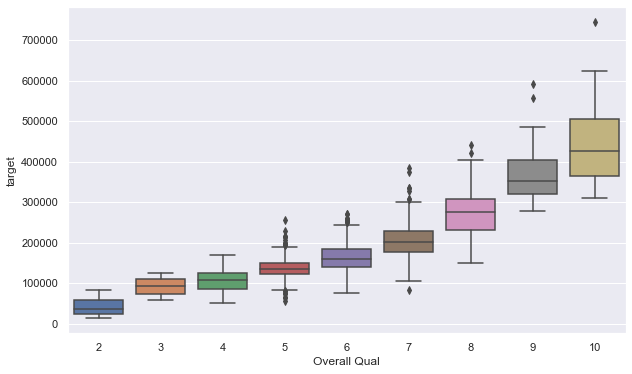

In [147]:
sns.boxplot(y = 'target', x = 'Overall_Qual', data = df)

`-` 퀄리티가 좋을수록 집값이 비싸다

#### 지상층 생활 면적

<AxesSubplot:xlabel='Gr_Liv_Area', ylabel='Count'>

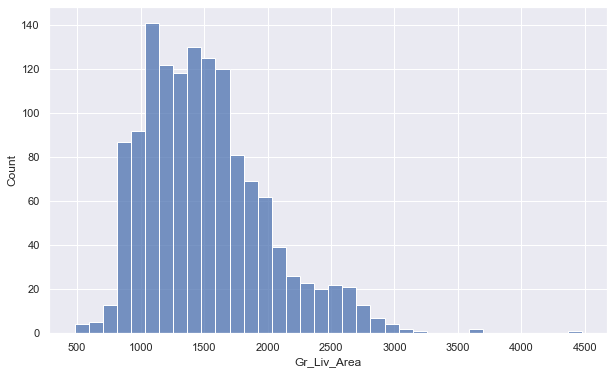

In [28]:
sns.histplot(x = 'Gr_Liv_Area', data = df)

`-` 범주형 변수별 지상층 생활 면적의 분포를 확인하자

In [30]:
df.groupby('Overall_Qual').size()

Overall_Qual
2       3
3       8
4      75
5     379
6     351
7     307
8     156
9      56
10     15
dtype: int64

<AxesSubplot:xlabel='Overall_Qual', ylabel='Gr_Liv_Area'>

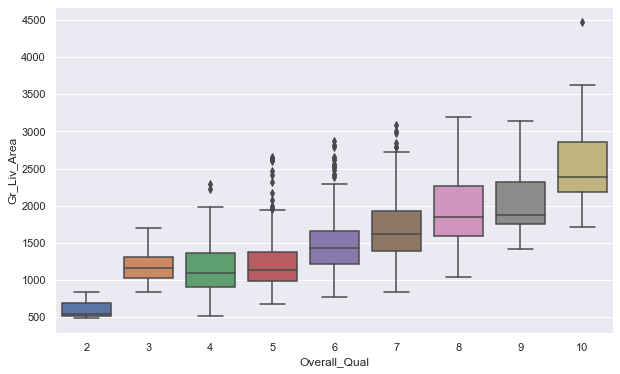

In [29]:
sns.boxplot(x = 'Overall_Qual', y = 'Gr_Liv_Area', data = df)

`-` 퀄리티가 높을수록 지상층 생활 면적이 더 넓다

<AxesSubplot:xlabel='Full_Bath', ylabel='Gr_Liv_Area'>

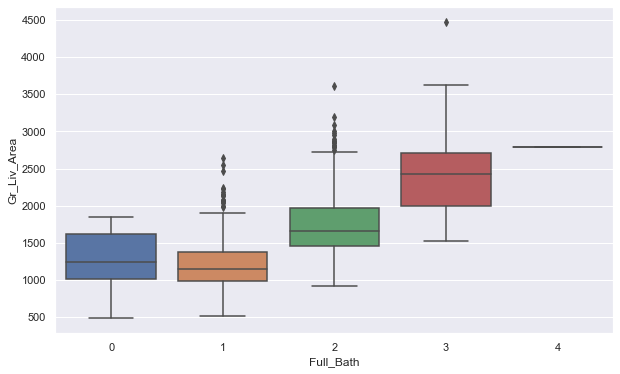

In [32]:
sns.boxplot(y = 'Gr_Liv_Area', x = 'Full_Bath', data = df)

<AxesSubplot:xlabel='Bsmt_Qual', ylabel='Gr_Liv_Area'>

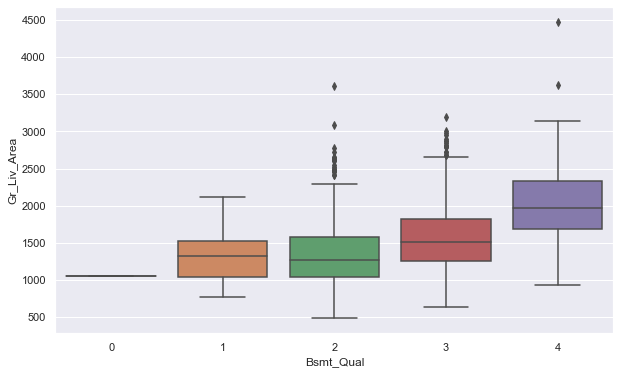

In [33]:
sns.boxplot(y = 'Gr_Liv_Area', x = 'Bsmt_Qual', data = df)

<AxesSubplot:xlabel='Kitchen_Qual', ylabel='Gr_Liv_Area'>

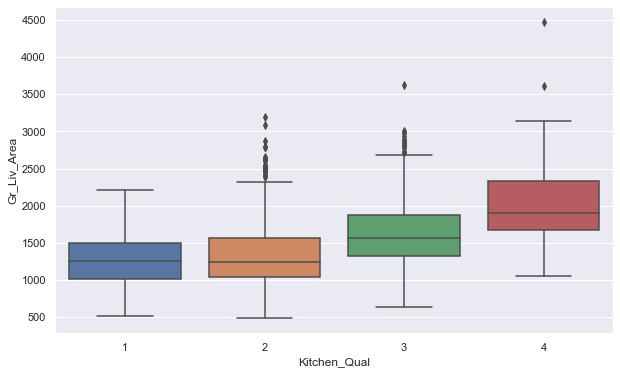

In [37]:
sns.boxplot(y = 'Gr_Liv_Area', x = 'Kitchen_Qual', data = df)

<AxesSubplot:xlabel='Exter_Qual', ylabel='Gr_Liv_Area'>

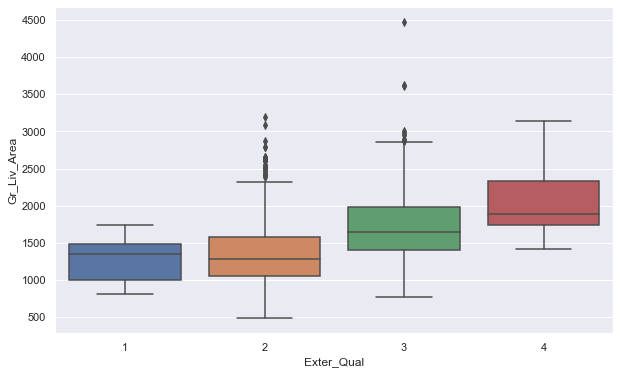

In [38]:
sns.boxplot(y = 'Gr_Liv_Area', x = 'Exter_Qual', data = df)

#### 지하실 면적

<AxesSubplot:xlabel='Total_Bsmt_SF'>

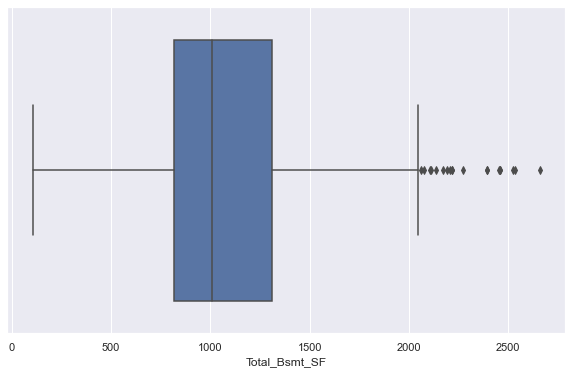

In [41]:
sns.boxplot(x = 'Total_Bsmt_SF', data = df)

<AxesSubplot:xlabel='Bsmt_Qual', ylabel='Total_Bsmt_SF'>

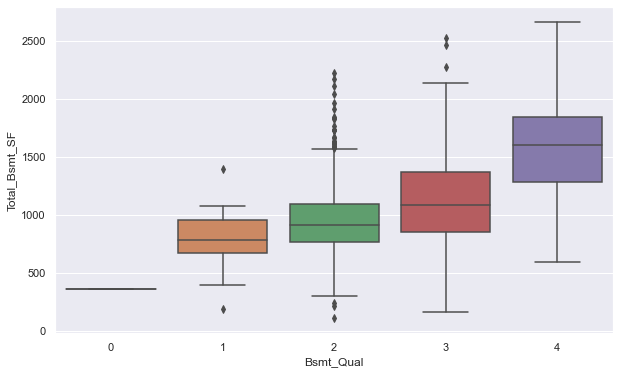

In [43]:
sns.boxplot(y = 'Total_Bsmt_SF', x = 'Bsmt_Qual', data = df)

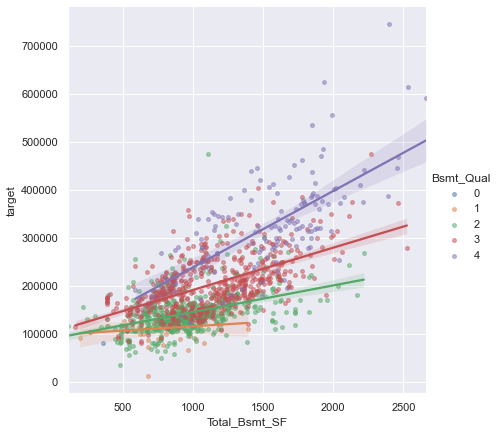

In [44]:
sns.lmplot(x = 'Total_Bsmt_SF', y = 'target', hue = 'Bsmt_Qual', scatter_kws = {'alpha':0.5, 's':15}, height = 6, data = df)

`-` Bsmt Qual(지하실 높이)에 따라 집값간의 기울기가 다르다

#### 차고 면적

<AxesSubplot:xlabel='Garage_Area'>

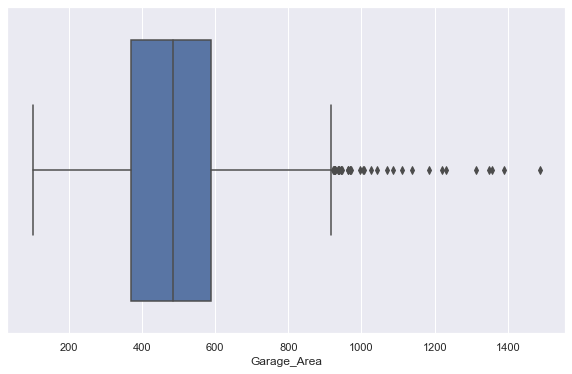

In [46]:
sns.boxplot(x = 'Garage_Area', data = df)

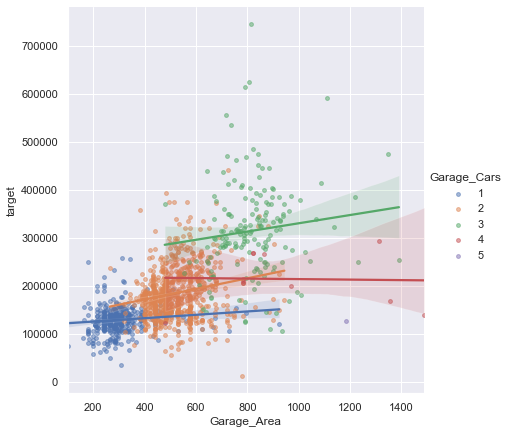

In [47]:
sns.lmplot(x = 'Garage_Area', y = 'target', hue = 'Garage_Cars', scatter_kws = {'alpha':0.5, 's':15}, height = 6, data = df)

#### 1층 면적

<AxesSubplot:xlabel='First_Flr_SF'>

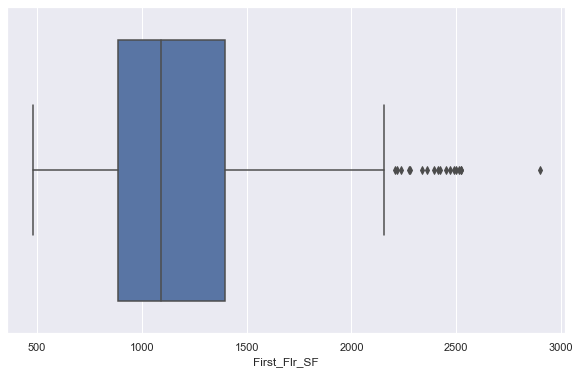

In [48]:
sns.boxplot(x = 'First_Flr_SF', data = df)

<AxesSubplot:xlabel='Overall_Qual', ylabel='First_Flr_SF'>

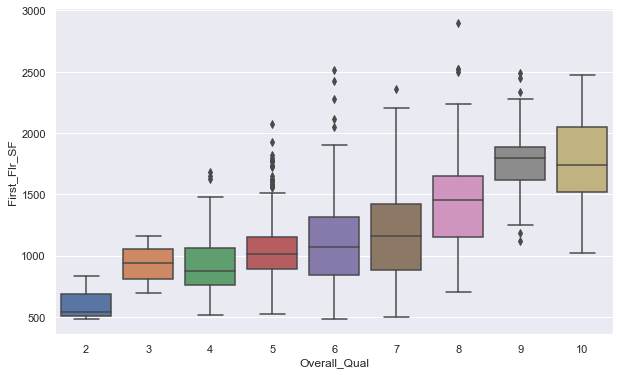

In [50]:
sns.boxplot(y = 'First_Flr_SF', x = 'Overall_Qual', data = df)

#### 전체 집의 면적

`-` 차고, 지상층, 지하실 면적을 합친 변수를 만들고 탐색하자

In [98]:
df['Total_SF'] = df['Garage_Area'] + df['Total_Bsmt_SF'] + df['Gr_Liv_Area']

<AxesSubplot:xlabel='Total_SF', ylabel='Count'>

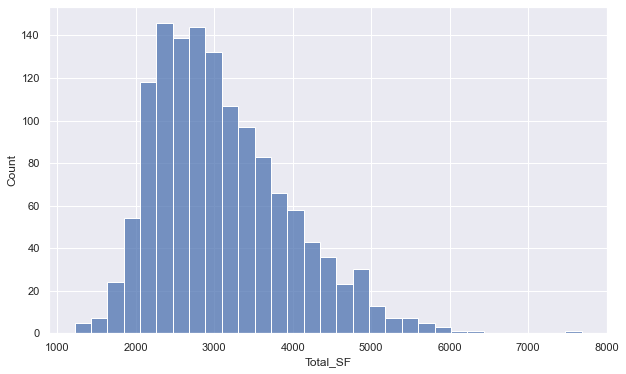

In [99]:
sns.histplot(data = df, x = 'Total_SF')

<AxesSubplot:xlabel='Total_SF'>

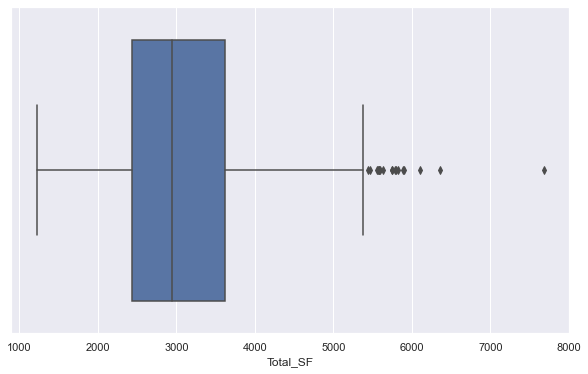

In [110]:
sns.boxplot(data = df, x = 'Total_SF')

<AxesSubplot:xlabel='Overall_Qual', ylabel='Total_SF'>

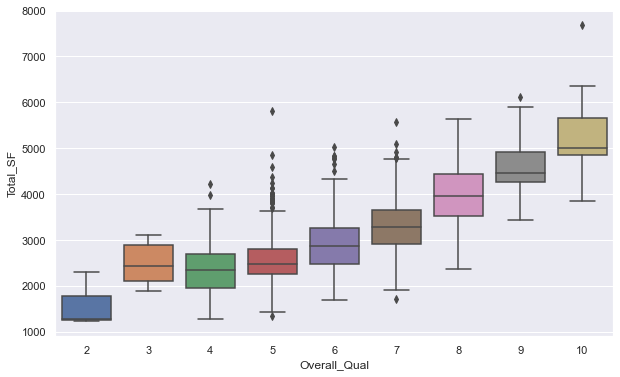

In [100]:
sns.boxplot(data = df, x = 'Overall_Qual', y = 'Total_SF')

<AxesSubplot:xlabel='Total_SF', ylabel='target'>

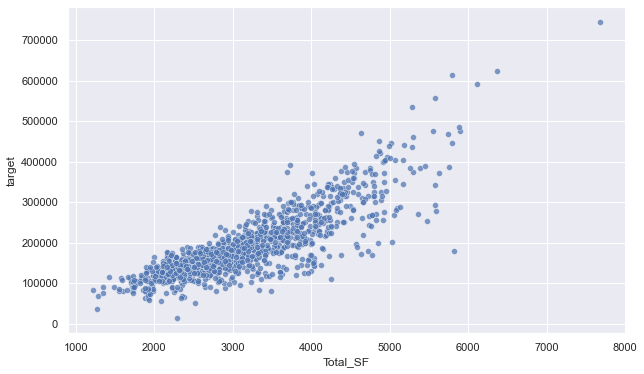

In [109]:
sns.scatterplot(data = df, y = 'target', x = 'Total_SF', alpha = 0.7)

#### 완공, 리모델링 연도

`-` 양적 변수인지 범주형 변수인지 애매함

<AxesSubplot:xlabel='Year_Built', ylabel='Count'>

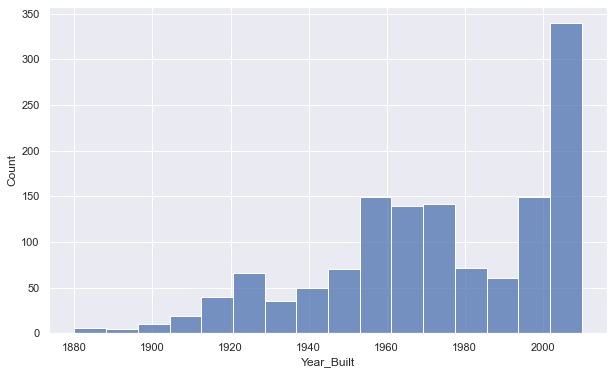

In [54]:
sns.histplot(x = 'Year_Built', data = df)

<AxesSubplot:xlabel='Year_Built', ylabel='target'>

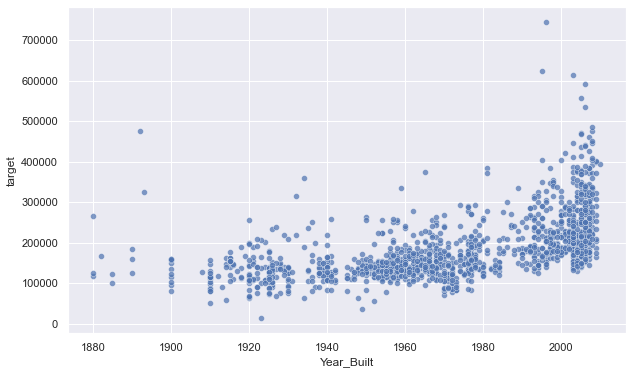

In [77]:
sns.scatterplot(x = 'Year_Built', y = 'target', alpha = 0.7, data = df)

<AxesSubplot:xlabel='Year_Built', ylabel='Year_Remod_Add'>

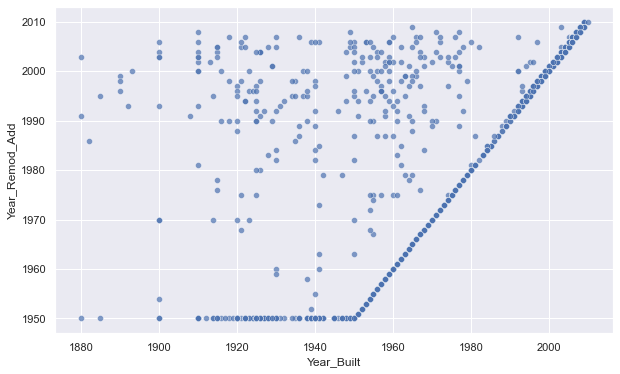

In [78]:
sns.scatterplot(x = 'Year_Built', y = 'Year_Remod_Add', alpha = 0.7, data = df)

`-`  완공 연도 < 리모델링 연도이다(완공하기 전에 리모델링을 할 순 없으니 당연하다)

`-` 또한 완공 연도와 리모델링 연도가 같은 집이 대부분이다

`-` `리모델링 연도 - 완공 연도` 라는 새로운 파생변수를 만들자

In [52]:
df['gap_Built_Remod_Add'] = df['Year_Remod_Add'] - df['Year_Built']

`-` 완공하고 몇년뒤에 리모델링을 했는지 시각화하자

<AxesSubplot:xlabel='Year_Built', ylabel='gap_Built_Remod_Add'>

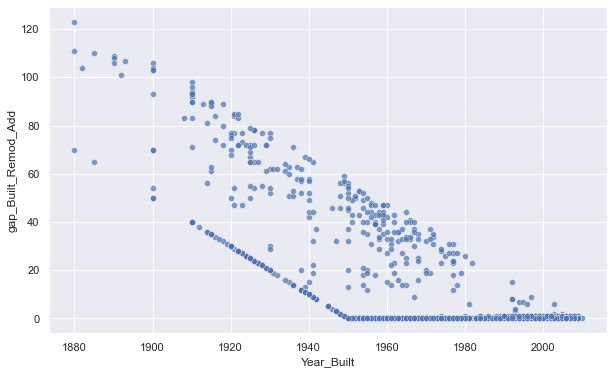

In [79]:
sns.scatterplot(x = 'Year_Built', y = 'gap_Built_Remod_Add', alpha = 0.7, data = df)

`-` 오래전에 지어진 건물일수록 건물을 짓고 한참 뒤에 리모델링을 한다

`-` 완공 연도와 리모델링 연도가 같은 건물들이 있다

`-` 어떤 건물인지 궁금하다

Text(0.5, 0.98, 'Bulit vs Remod Add')

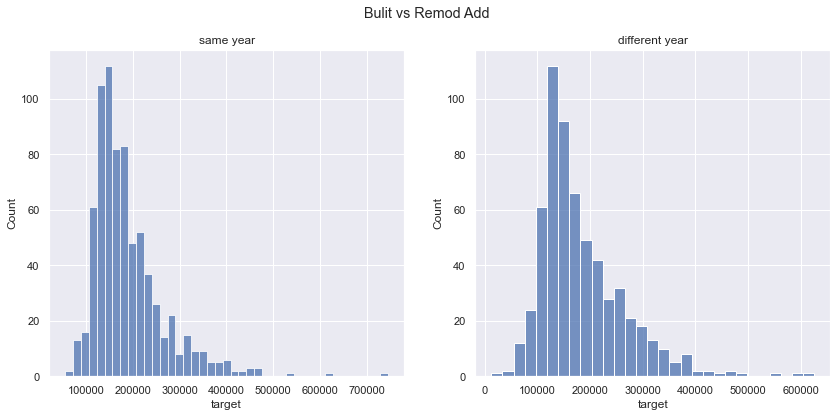

In [73]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 6))
sns.histplot(data = df.query('gap_Built_Remod_Add == 0'), x = 'target', ax = ax1)
sns.histplot(data = df.query('gap_Built_Remod_Add > 0'), x = 'target', ax = ax2)
ax1.set_title('same year')
ax2.set_title('different year')
fig.suptitle('Bulit vs Remod Add')

`-` 완공 연도에 리모델링을 한다고 집값에서 차이가 있진 않다

`-` 그렇다면 최근에 리모델링을 한 건물의 집값이 더 비싼지 궁금하다

Text(0.5, 0.98, 'house price')

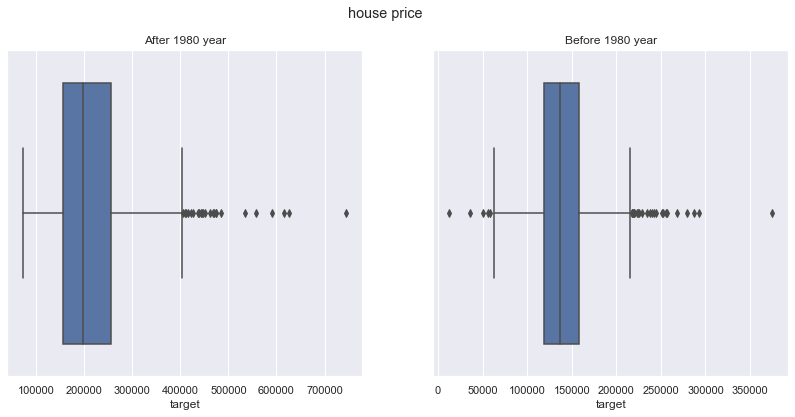

In [74]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 6))
sns.boxplot(data = df.query('Year_Remod_Add >= 1980'), x = 'target', ax = ax1)
sns.boxplot(data = df.query('Year_Remod_Add < 1980'), x = 'target', ax = ax2)
ax1.set_title('After 1980 year')
ax2.set_title('Before 1980 year')
fig.suptitle('house price')

`-` 1980년을 기준으로 1980년 이후의 집이 1980년 이전의 집보다 비싸다

#### box plot

`-` 전체적으로 박스플랏을 그려보자

In [80]:
numeric_feature = df.columns[(df.dtypes == np.int64) | (df.dtypes == float)]
categorical_feature = df.columns[df.dtypes == 'O']

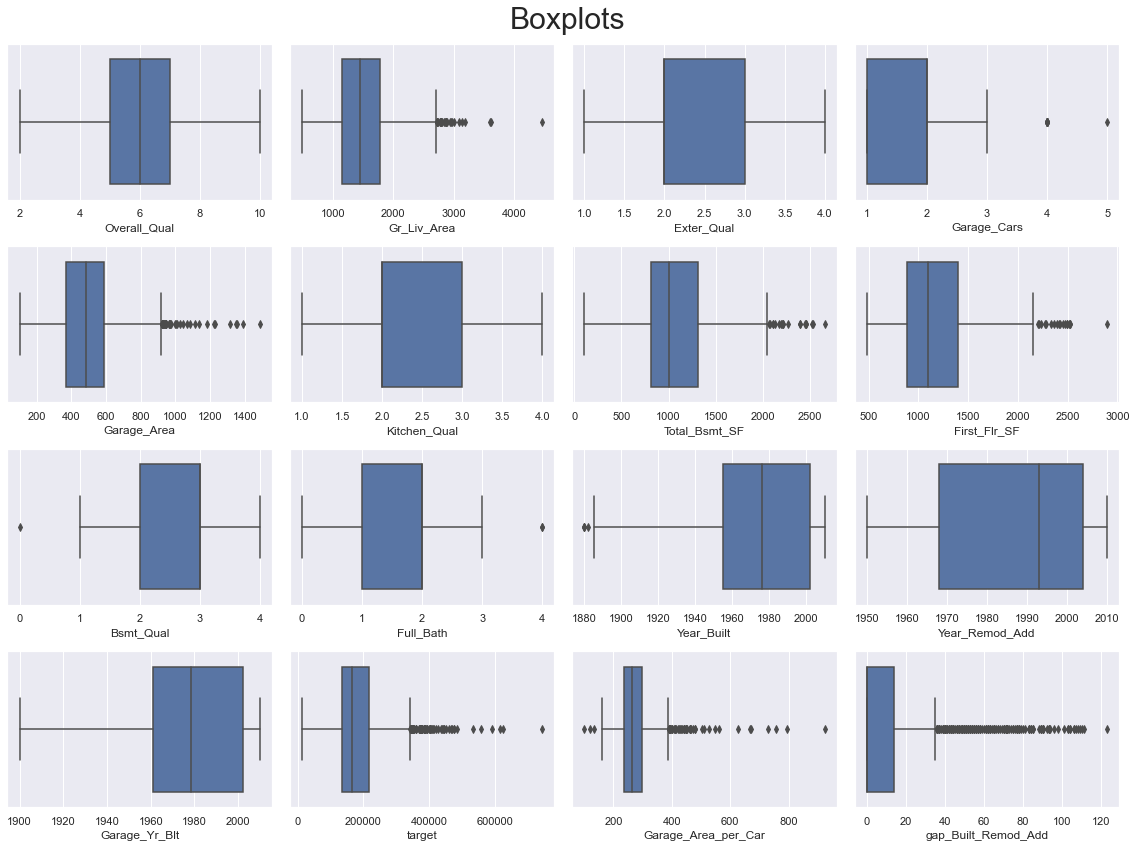

In [84]:
## Boxplot 사용

plt.figure(figsize = (16, 12))
plt.suptitle('Boxplots', fontsize = 30)

for i in range(len(numeric_feature)):
    plt.subplot(4, 4, i+1)  
    sns.boxplot(x = numeric_feature[i], data = df)
    
plt.tight_layout()

`-` 이상점이 많은 피쳐는 오른쪽으로 꼬리가 긴 분포인데 이는 로그 변환을 통해 정규분포로 바꿔줄 수 있다

#### 상관관계

<AxesSubplot:>

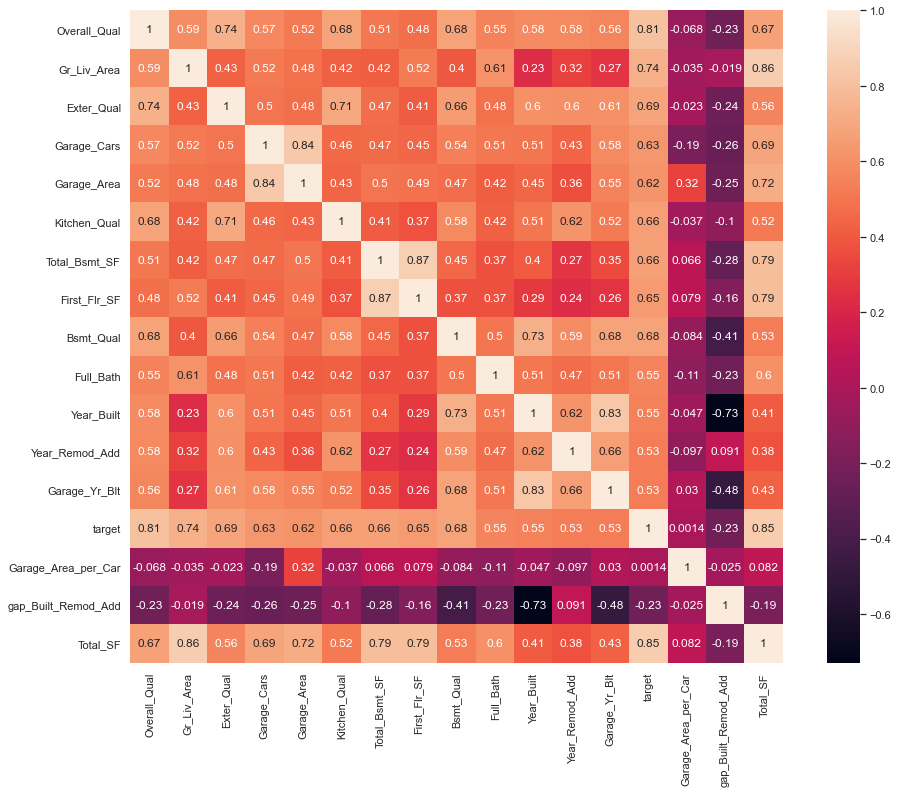

In [114]:
plt.figure(figsize = (16, 12))
corr_matrix = df.corr(method = 'pearson') # 상관관계 행렬
sns.heatmap(corr_matrix, annot = True, square = True)

`-` 히트맵을 보면 전체적으로 상관계수가 높게 나온다(다중공선성을 조심해야 함)

`-` 차고와 차량 개수, 완공 연도와 리모델링 연도는 상관계수가 높은 것이 당연해보인다

`-` 1층 면적과 지하실 면적의 상관계수가 0.87로 매우 높다

`-` 같은 면적 변수여서 상관계수가 높다기엔 지상층 면적과의 상관계수는 그리 높지 않은점이 신기하다

#### pair plot

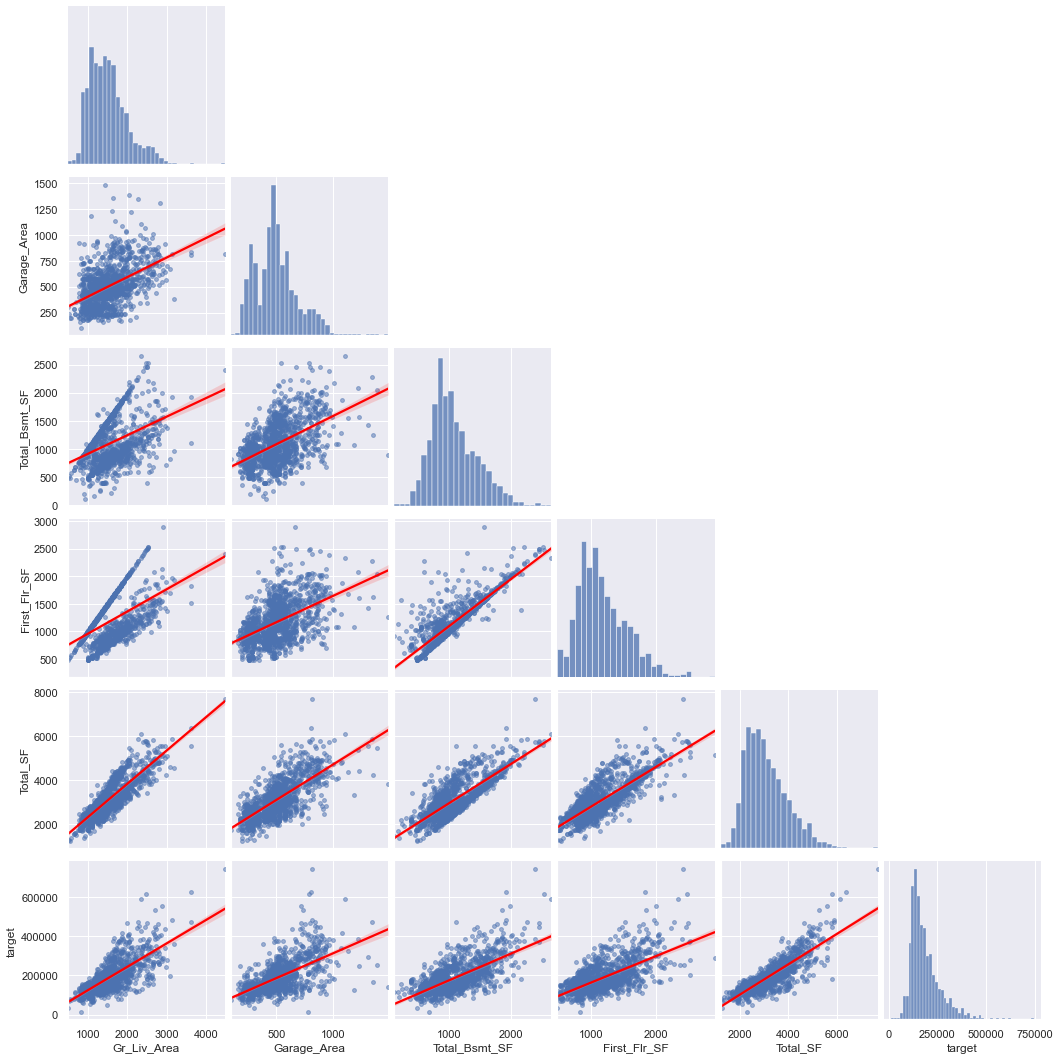

In [111]:
sns.pairplot(data = df, vars = ['Gr_Liv_Area', 'Garage_Area', 'Total_Bsmt_SF', 'First_Flr_SF', 'Total_SF', 'target'], kind = 'reg',
             diag_kind = 'hist', corner = True, plot_kws = {'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.5, 's':15}})

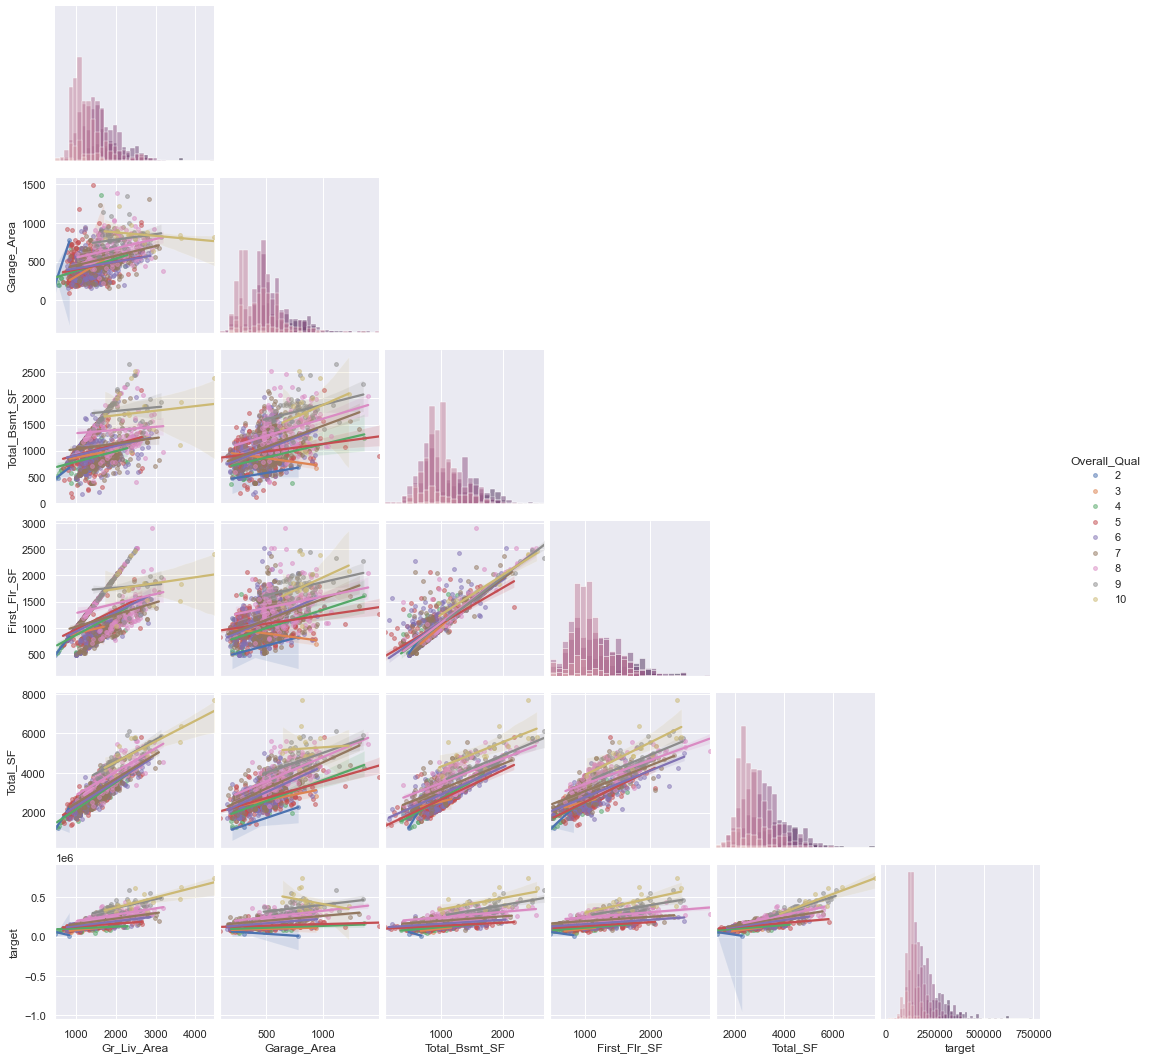

In [112]:
sns.pairplot(data = df, vars = ['Gr_Liv_Area', 'Garage_Area', 'Total_Bsmt_SF', 'First_Flr_SF', 'Total_SF', 'target'], kind = 'reg', hue = 'Overall_Qual',
             diag_kind = 'hist', corner = True, plot_kws = {'scatter_kws': {'alpha': 0.5, 's':15}})